In [24]:
import numpy as np
from pykrx import stock
import matplotlib.pyplot as plt

출처: [https://medium.com/swlh/trading-the-envelopes-a-python-study-6c2b2b2d5963](Trading the Envelopes — A Python Study.)

In [5]:
symbol = '089150' # 케이씨티
df = stock.get_market_ohlcv("20210101", "20210701", symbol)
df.rename(columns={
    '시가': 'Open',
    '고가': 'High',
    '저가': 'Low',
    '종가': 'Close',
    '거래량': 'Volume'
    }, inplace=True)

In [6]:
df.tail()

,Open,High,Low,Close,Volume
날짜,,,,,
2021-06-25,9120,9640,9090,9270,687289
2021-06-28,9340,9500,9230,9280,154972
2021-06-29,9250,9450,9240,9270,191072
2021-06-30,9340,9400,9250,9260,119571
2021-07-01,9270,9380,9190,9220,138459


<AxesSubplot:xlabel='날짜'>

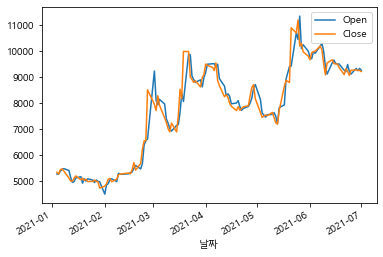

In [9]:
df[['Open', 'Close']].plot()

In [18]:
# MA 함수
def ma(Data, lookback, what, where):
    for i in range(len(Data)):
        try:
            Data[i, where] = (Data[i - lookback + 1:i + 1, what].mean())
        except IndexError:
            pass
    return Data

# Data np.arry에 새로운 빈 컬럼 추가 함수
def adder(Data, times):
    for i in range(1, times + 1):
        z = np.zeros((len(Data), 1), dtype = float)
        Data = np.append(Data, z, axis = 1)
    return Data

# Envelopes 지표 생성
## 사용 예:
# Calling the function on the closing price (index = 3) 
## my_data = envelopes(my_data, 10, 0.0025, 3, 4) #  deviation of 0.25%
def envelopes(Data, lookback, deviation, what, where):
    # Calculating the moving average
    Data = ma(Data, lookback, what, where)
    # Upper Envelope
    Data[:, where + 1] = Data[:, where] + (Data[:, where] * deviation)
    # Lower Envelope       
    Data[:, where + 2] = Data[:, where] - (Data[:, where] * deviation)
    return Data

In [48]:
# df OHCLV DataFrame으로 부터 numpy array로 변환
my_data = df.to_numpy()
my_data[-5:]

array([[  9120,   9640,   9090,   9270, 687289],
       [  9340,   9500,   9230,   9280, 154972],
       [  9250,   9450,   9240,   9270, 191072],
       [  9340,   9400,   9250,   9260, 119571],
       [  9270,   9380,   9190,   9220, 138459]])

### MA만 구해봄

In [49]:
# Adding 1 extra column
my_data = adder(my_data, 1)
# Calling the moving average function
my_data = ma(my_data, 200, 3, 5)
my_data[-5:]

array([[  9120.        ,   9640.        ,   9090.        ,
          9270.        , 687289.        ,   8805.26315789],
       [  9340.        ,   9500.        ,   9230.        ,
          9280.        , 154972.        ,   8834.86842105],
       [  9250.        ,   9450.        ,   9240.        ,
          9270.        , 191072.        ,   8866.05263158],
       [  9340.        ,   9400.        ,   9250.        ,
          9260.        , 119571.        ,   8892.63157895],
       [  9270.        ,   9380.        ,   9190.        ,
          9220.        , 138459.        ,   8923.15789474]])

### envelope를 구함

In [50]:
my_data = adder(my_data, 2) # Upper, Lower를 위해 2개 컬럼 추가
# Calling the function on the closing price (index = 3) 
my_data = envelopes(my_data, 20, 0.05, 3, 5)
my_data[-5:]

C:\Users\hillk\AppData\Local\Temp/ipykernel_25140/2430593817.py:5: RuntimeWarning: Mean of empty slice.
  Data[i, where] = (Data[i - lookback + 1:i + 1, what].mean())


array([[  9120.   ,   9640.   ,   9090.   ,   9270.   , 687289.   ,
          9570.5  ,  10049.025,   9091.975],
       [  9340.   ,   9500.   ,   9230.   ,   9280.   , 154972.   ,
          9544.   ,  10021.2  ,   9066.8  ],
       [  9250.   ,   9450.   ,   9240.   ,   9270.   , 191072.   ,
          9524.   ,  10000.2  ,   9047.8  ],
       [  9340.   ,   9400.   ,   9250.   ,   9260.   , 119571.   ,
          9490.   ,   9964.5  ,   9015.5  ],
       [  9270.   ,   9380.   ,   9190.   ,   9220.   , 138459.   ,
          9452.   ,   9924.6  ,   8979.4  ]])

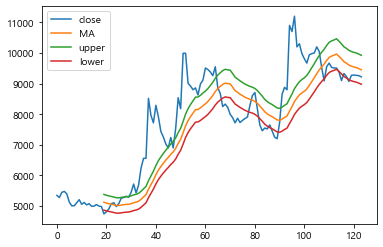

In [52]:
x = np.arange(len(my_data))
plt.plot(x, my_data[:,3], label='close')
plt.plot(x, my_data[:,5], label='MA')
plt.plot(x, my_data[:,6], label='upper')
plt.plot(x, my_data[:,7], label='lower')
plt.legend()